In [36]:
import numpy as np
from collections import deque, defaultdict
import random, sys, math, gym

In [37]:
class Agent:

    def __init__(self, nA=6):
        self.nA = nA
        self.Q = defaultdict(lambda: np.zeros(self.nA))
        self.epsilon = 0.1
        self.alpha = 0.1
        self.gamma = 0.8
        self.episode = 1

    def select_action(self, state, i_episode, num_episodes):
        if i_episode != self.episode and i_episode % (num_episodes * 0.0005) == 0:
            self.epsilon -= 50/num_episodes
            
        if i_episode != self.episode and i_episode % (num_episodes * 0.005) == 0:
            self.alpha -= 20/num_episodes
            self.epsilon = 0.8
        
        if i_episode != self.episode and i_episode % (num_episodes * 0.05) == 0:
            self.gamma -= 20/num_episodes
            self.epsilon = 0.8
            self.alpha = 0.8

        return np.argmax(self.Q[state])    
    
    def step(self, state, action, reward, next_state, done):
        next_action = np.argmax(self.Q[state]) 
        self.Q[state][action] = self.Q[state][action] + (self.alpha * (reward + \
            (self.gamma * np.max(self.Q[next_state])) - self.Q[state][action]))

In [38]:
def interact(env, agent, num_episodes=100000, window=100):
    # initialize average rewards
    avg_rewards = deque(maxlen=num_episodes)
    # initialize best average reward
    best_avg_reward = -math.inf
    # initialize monitor for most recent rewards
    samp_rewards = deque(maxlen=window)
    # for each episode
    for i_episode in range(1, num_episodes+1):
        # begin the episode
        state = env.reset()
        # initialize the sampled reward
        samp_reward = 0
        while True:
            # agent selects an action
            action = agent.select_action(state, i_episode, num_episodes)
            # agent performs the selected action
            next_state, reward, done, _ = env.step(action)
            # agent performs internal updates based on sampled experience
            agent.step(state, action, reward, next_state, done)
            # update the sampled reward
            samp_reward += reward
            # update the state (s <- s') to next time step
            state = next_state
            if done:
                # save final sampled reward
                samp_rewards.append(samp_reward)
                break
        if (i_episode >= 100):
            # get average reward from last 100 episodes
            avg_reward = np.mean(samp_rewards)
            # append to deque
            avg_rewards.append(avg_reward)
            # update best average reward
            if avg_reward > best_avg_reward:
                best_avg_reward = avg_reward
        print("\rEpisode {} , epsilon = {:.8f}, alpha = {:.5f}, gamma = {:.3f}|| Best average reward {:.3f}".format(
            i_episode, agent.epsilon, agent.alpha, agent.gamma, best_avg_reward), end="")
        sys.stdout.flush()
        # check if task is solved (according to OpenAI Gym)
        if best_avg_reward >= 9.7:
            print('\nEnvironment solved in {} episodes.'.format(i_episode), end="")
            break
        if i_episode == num_episodes: print('\n')
    return avg_rewards, best_avg_reward

In [40]:
env = gym.make('Taxi-v2')
agent = Agent()
avg_rewards, best_avg_reward = interact(env, agent)

Episode 51397 , epsilon = 0.76150000, alpha = 0.79480, gamma = 0.773|| Best average reward 9.70000
Environment solved in 51397 episodes.

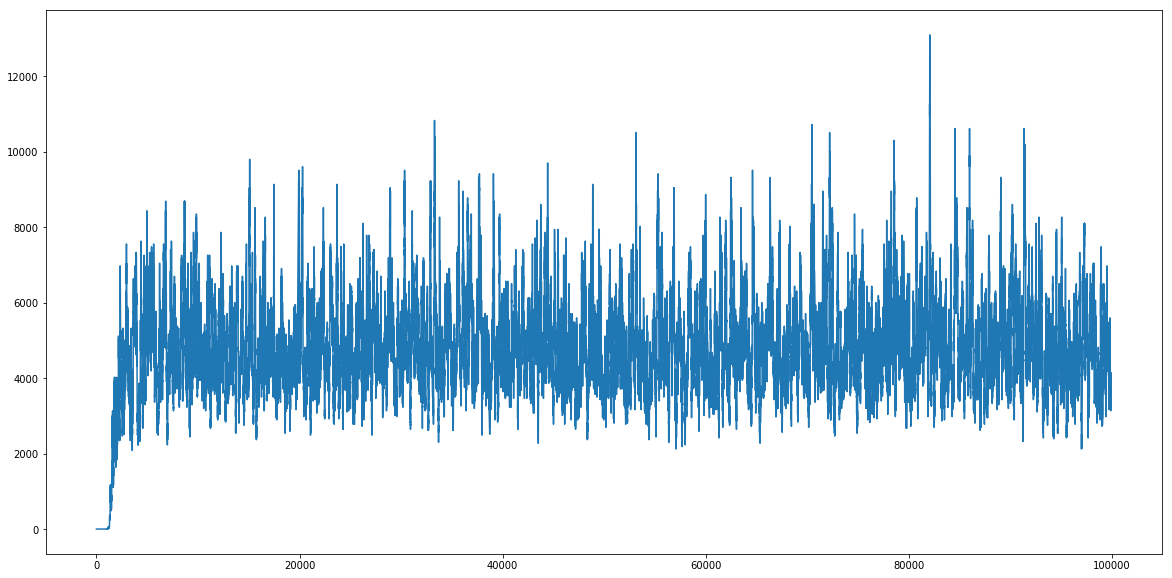

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20, 10))
plt.plot(np.exp(avg_rewards))
plt.show()